<a href="https://colab.research.google.com/github/KIMHYOENJUN/test_project3/blob/main/Train_YoloV3_ipynb_minju_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect google drive**

**1) Clone the Darknet**



**2) Compile Darknet using Nvidia GPU**


**3) Configure Darknet network for training YOLO V3**

**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

**6) Start the training**

In [ ]:
!./darknet detector calc_anchors data/obj.data cfg/yolov3_training.cfg -num_of_clusters 9 -width 416 -height 416

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 미세먼지-1.gdoc		     '수업 계획.gslides'
'제목없는 프레젠테이션 (1).gslides'  '제목없는 프레젠테이션.gslides'
'딥러닝 chart 1.png'		     'My Drive'
'딥러닝 chart 2 2000.png'	      server
'딥러닝 chart 3 3000.png'	      Untitled.ipynb
'Colab Notebooks'		      yolov3
 dataset


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15298 (delta 158), reused 144 (delta 144), pack-reused 15139
Receiving objects: 100% (15298/15298), 13.67 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
 
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
 
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!cp /mydrive/yolov3/train.zip ../

In [ ]:
!cp /mydrive/yolov3/valid.zip ../

In [ ]:
!unzip ../train.zip -d data/

Archive:  ../train.zip
  inflating: data/train/fire_1.jpg   
  inflating: data/train/fire_1.txt   
  inflating: data/train/fire_10.jpg  
  inflating: data/train/fire_10.txt  
  inflating: data/train/fire_100.jpg  
  inflating: data/train/fire_100.txt  
  inflating: data/train/fire_11.jpg  
  inflating: data/train/fire_11.txt  
  inflating: data/train/fire_12.jpg  
  inflating: data/train/fire_12.txt  
  inflating: data/train/fire_13.jpg  
  inflating: data/train/fire_13.txt  
  inflating: data/train/fire_14.jpg  
  inflating: data/train/fire_14.txt  
  inflating: data/train/fire_15.jpg  
  inflating: data/train/fire_15.txt  
  inflating: data/train/fire_16.jpg  
  inflating: data/train/fire_16.txt  
  inflating: data/train/fire_17.jpg  
  inflating: data/train/fire_17.txt  
  inflating: data/train/fire_18.jpg  
  inflating: data/train/fire_18.txt  
  inflating: data/train/fire_19.jpg  
  inflating: data/train/fire_19.txt  
  inflating: data/train/fire_2.jpg   
  inflating: data/train/f

In [ ]:
!unzip ../valid.zip -d data/

Archive:  ../valid.zip
  inflating: data/valid/fire_1.jpg   
  inflating: data/valid/fire_1.txt   
  inflating: data/valid/fire_10.jpg  
  inflating: data/valid/fire_10.txt  
  inflating: data/valid/fire_11.jpg  
  inflating: data/valid/fire_11.txt  
  inflating: data/valid/fire_12.jpg  
  inflating: data/valid/fire_12.txt  
  inflating: data/valid/fire_13.jpg  
  inflating: data/valid/fire_13.txt  
  inflating: data/valid/fire_14.jpg  
  inflating: data/valid/fire_14.txt  
  inflating: data/valid/fire_15.jpg  
  inflating: data/valid/fire_15.txt  
  inflating: data/valid/fire_16.jpg  
  inflating: data/valid/fire_16.txt  
  inflating: data/valid/fire_17.jpg  
  inflating: data/valid/fire_17.txt  
  inflating: data/valid/fire_18.jpg  
  inflating: data/valid/fire_18.txt  
  inflating: data/valid/fire_19.jpg  
  inflating: data/valid/fire_19.txt  
  inflating: data/valid/fire_2.jpg   
  inflating: data/valid/fire_2.txt   
  inflating: data/valid/fire_20.jpg  
  inflating: data/valid/fir

In [ ]:
!cp /mydrive/yolov3/yolov3_training.cfg ./cfg

In [ ]:
!cp /mydrive/yolov3/custom.names ./data
!cp /mydrive/yolov3/custom.data  ./data

In [ ]:
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
!cp /mydrive/yolov3/generate_valid.py ./

In [ ]:
!python generate_train.py

In [ ]:
!python generate_valid.py

In [ ]:
!ls data/

9k.tree       eagle.jpg			labels		  scream.jpg
coco9k.map    giraffe.jpg		obj		  train
coco.names    goal.txt			obj.data	  train.txt
custom.data   horses.jpg		obj.names	  valid
custom.names  imagenet.labels.list	openimages.names  valid.txt
dog.jpg       imagenet.shortnames.list	person.jpg	  voc.names


In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-08-11 08:04:42--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-08-11 08:04:42--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  61.2MB/s    in 2.5s    

2021-08-11 08:04:44 (61.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/custom.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -map

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.916303), count: 1, class_loss = 0.000046, iou_loss = 0.069762, total_loss = 0.069808 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 250470, rewritten_bbox = 0.000000 % 

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.50 = 46.38 %, best = 57.83 % 
 2981: 0.064694, 0.079443 avg loss, 0.000010 rate, 11.204027 seconds, 190784 images, 0.254636 hours left
Loaded: 0.000031 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.905607), count: 2, class_loss = 0.008812, iou_loss = 0.028101, total_loss = 0.036913 
v3 (mse loss, 

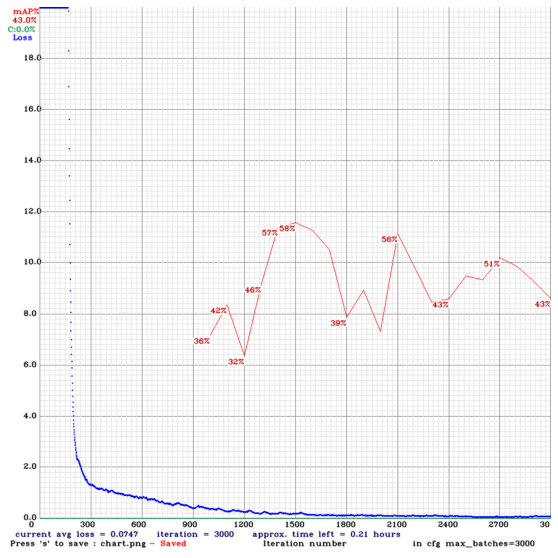

In [ ]:
imShow('chart.png')

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_training.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_training.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

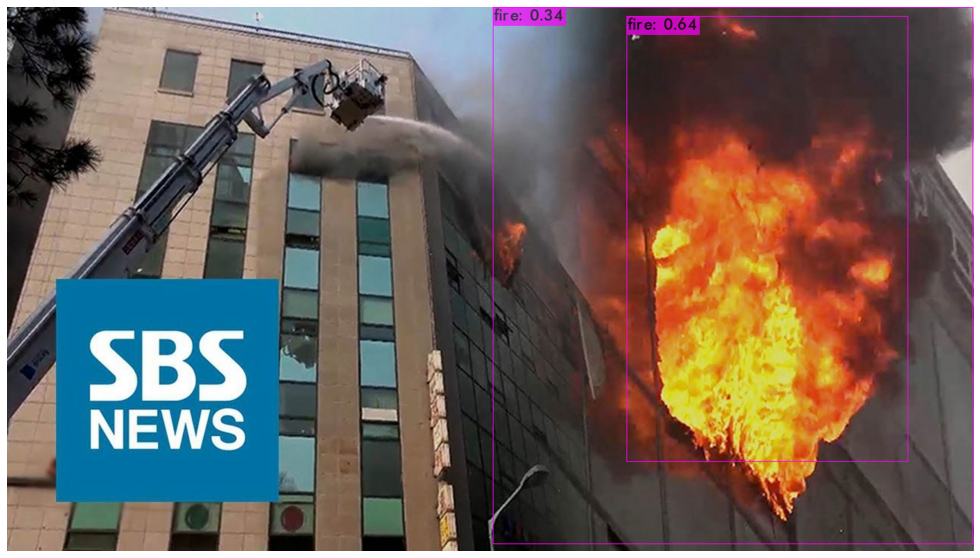

In [ ]:
!./darknet detector test data/custom.data cfg/yolov3_training.cfg /mydrive/yolov3/backup/yolov3_training_best.weights data/valid/fire_25.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!cp /mydrive/yolov3/convert.py ./

In [ ]:
!python convert.py cfg/yolov3_training.cfg /mydrive/yolov3/backup/yolov3_training_best.weights /mydrive/yolov3/fire.h5

2021-08-16 06:18:54.066189: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Loading weights.
Weights Header:  0 2 5 [96000]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2021-08-16 06:18:55.607667: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-16 06:18:55.640636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-16 06:18:55.641231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-16 06:18:55.641280: I tensorflow/